In [1]:
##########################################################################                    
############################ DATA PREPARATION ############################
##########################################################################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

"""Script to process IMDB dataset"""

                        ######################################                    
                        #### POSITIVE REVIEWS TRAIN DATA #####
                        ######################################
            


path_pos = 'aclImdb/train/pos/'
filelist_pos = os.listdir(path_pos) ####the fileist is not ordered by name of file 
data_pos= []
j=0
id_rating_pos = []

import string
table = str.maketrans('', '', string.punctuation)

#iterate through files in directory
for file in filelist_pos:
    f = open(path_pos+file, 'r', encoding='utf8')
    data_pos.append((f.read()))
    
    name = os.path.splitext(file)[0]
    id_rating_pos.append(name.split("_"))
    
    j=j+1
    f.close()
    
#### Get the y_train as the ratings
rating_pos = []

for i in id_rating_pos:
    #rating_pos.append(i[1])
    rating_pos.append('1') # as per myCourses announcement, should do binary classification - all pos reviews labeled '1'
    
                        ######################################                    
                        #### NEGATIVE REVIEWS TRAIN DATA #####
                        ######################################

## directory: aclImdb/train/pos/FILES & aclImdb/train/neg/FILES ##
path_neg = 'aclImdb/train/neg/'
filelist_neg = os.listdir(path_neg) ####the fileist is not ordered by name of file 
data_neg= []
i=0
id_rating_neg = []

import string
table = str.maketrans('', '', string.punctuation)

#iterate through files in directory
for file in filelist_neg:
    f = open(path_neg+file, 'r', encoding='utf8')
    data_neg.append((f.read()))
    
    name = os.path.splitext(file)[0]
    id_rating_neg.append(name.split("_"))
    
    i=i+1
    f.close()

rating_neg = []

for i in id_rating_neg:
    #rating_neg.append(i[1])
    rating_neg.append('0') # as per myCourses announcement, should do binary classification - all neg reviews labeled '0'
    
##### ##### ##### ##### ##### ##### ##### ##### ###
##### APPEND BOTH POS & NEG TRAINING DATASETS #####
##### ##### ##### ##### ##### ##### ##### ##### ###

X_train_IMDb = data_pos+data_neg # as a list
X_train_IMDb_np = np.array(X_train_IMDb) # NOT NEEDED
y_train_IMDb = np.array(rating_pos+rating_neg)# as a numpy array
    
                        ######################################                    
                        #### POSITIVE REVIEWS TEST DATA #####
                        ######################################
            


path_pos_test = 'aclImdb/test/pos/'
filelist_pos_test = os.listdir(path_pos_test) ####the fileist is not ordered by name of file 
data_pos_test= []
j=0
id_rating_pos_test = []

import string
table = str.maketrans('', '', string.punctuation)

#iterate through files in directory
for file in filelist_pos_test:
    f = open(path_pos_test+file, 'r', encoding='utf8')
    data_pos_test.append((f.read()))
    
    name = os.path.splitext(file)[0]
    id_rating_pos_test.append(name.split("_"))
    
    j=j+1
    f.close()

#### Get the y_train as the ratings
rating_pos_test = []

for i in id_rating_pos_test:
    #rating_pos_test.append(i[1])
    rating_pos_test.append('1') # as per myCourses announcement, should do binary classification - all pos reviews labeled '1'

                        ######################################                    
                        #### NEGATIVE REVIEWS TEST DATA #####
                        ######################################

path_neg_test = 'aclImdb/test/neg/'
filelist_neg_test = os.listdir(path_neg_test) ####the fileist is not ordered by name of file 
data_neg_test= []
i=0
id_rating_neg_test = []

import string
table = str.maketrans('', '', string.punctuation)

#iterate through files in directory
for file in filelist_neg_test:
    f = open(path_neg_test+file, 'r', encoding='utf8')
    data_neg_test.append((f.read()))
    
    name = os.path.splitext(file)[0]
    id_rating_neg_test.append(name.split("_"))
    
    i=i+1
    f.close()
    

rating_neg_test = []

for i in id_rating_neg_test:
    #rating_neg_test.append(i[1])
    rating_neg_test.append('0') # as per myCourses announcement, should do binary classification - all neg reviews labeled '0'
    
##### ##### ##### ##### ##### ##### ##### ##### ##
##### APPEND BOTH POS & NEG TESTING DATASETS #####
##### ##### ##### ##### ##### ##### ##### ##### ##

X_test_IMDb = data_pos_test+data_neg_test # as a list
X_test_IMDb_np = np.array(X_test_IMDb) # NOT NEEDED
y_test_IMDb = np.array(rating_pos_test+rating_neg_test)# as a numpy array

"""Define count vectorizer and tf-idf transformations"""

###### Count Vectorizer #######
from sklearn.feature_extraction.text import CountVectorizer
### Filter out these stopwords ####
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
#### Filter: Stopwords, token_pattern filters out the non-letter characters
count_vect = CountVectorizer(analyzer='word', stop_words = stopwords,  token_pattern = r'\b[^\d\W_/]+\b')

########## TFIDF ############
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True,smooth_idf=True) # turned on idf and smooth idf

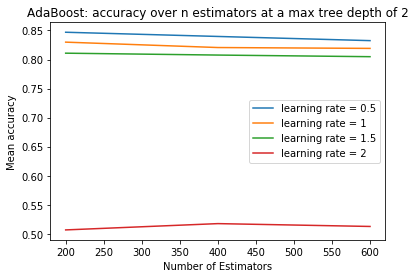

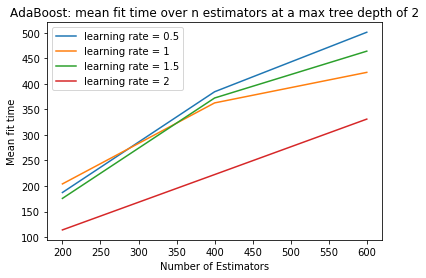

Tree depth 2, learning rate 0.5, best n estimators: 200
Tree depth 2, learning rate 0.5, best score: 0.84692
Test accuracy of AdaBoost (depth = 2, alpha = 0.5) with best params: 0.8552
Tree depth 2, learning rate 1, best n estimators: 200
Tree depth 2, learning rate 1, best score: 0.82988
Test accuracy of AdaBoost (depth = 2, alpha = 1) with best params: 0.84192
Tree depth 2, learning rate 1.5, best n estimators: 200
Tree depth 2, learning rate 1.5, best score: 0.81088
Test accuracy of AdaBoost (depth = 2, alpha = 1.5) with best params: 0.82172
Tree depth 2, learning rate 2, best n estimators: 400
Tree depth 2, learning rate 2, best score: 0.51748
Test accuracy of AdaBoost (depth = 2, alpha = 2) with best params: 0.47516


In [7]:
###############################################################
### AdaBoost: Comparing Learning Rates with Tree Depth of 2 ###
###############################################################

# packages
import os  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

decisiontree_clf = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier()
adaboost_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', adaboost_clf)])

if not os.path.exists('AdaBoost'):
  os.makedirs('AdaBoost')

# Decision Tree Depth of 2, learning rate of 0.5
adaboost_params_1 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=2)], 'clf__n_estimators': [200,400,600], 'clf__learning_rate': [0.5]}
adaboost_CV_1 =  GridSearchCV(adaboost_pipeline, param_grid=adaboost_params_1, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_1.fit(X_train_IMDb, y_train_IMDb)

# Decision Tree Depth of 2, learning rate of 1
adaboost_params_2 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=2)], 'clf__n_estimators': [200,400,600], 'clf__learning_rate': [1]}
adaboost_CV_2 =  GridSearchCV(adaboost_pipeline, param_grid=adaboost_params_2, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_2.fit(X_train_IMDb, y_train_IMDb)

# Decision Tree Depth of 2, learning rate of 1.5
adaboost_params_3 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=2)], 'clf__n_estimators': [200,400,600], 'clf__learning_rate': [1.5]}
adaboost_CV_3 =  GridSearchCV(adaboost_pipeline, param_grid=adaboost_params_3, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_3.fit(X_train_IMDb, y_train_IMDb)

# Decision Tree Depth of 2, learning rate of 2
adaboost_params_4 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=2)], 'clf__n_estimators': [200,400,600], 'clf__learning_rate': [2]}
adaboost_CV_4 =  GridSearchCV(adaboost_pipeline, param_grid=adaboost_params_4, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_4.fit(X_train_IMDb, y_train_IMDb)


plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_test_score'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_test_score'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_test_score'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_test_score'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("AdaBoost: accuracy over n estimators at a max tree depth of 2")
plt.legend()
plt.savefig("AdaBoost/imdb_accuracy_depth_2.png")
plt.show()

plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_fit_time'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_fit_time'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_fit_time'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_fit_time'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean fit time")
plt.title("AdaBoost: mean fit time over n estimators at a max tree depth of 2")
plt.legend()
plt.savefig("AdaBoost/imdb_time_depth_2.png")
plt.show()

print("Tree depth 2, learning rate 0.5, best n estimators: "+ str(adaboost_CV_1.best_params_['clf__n_estimators']))
print("Tree depth 2, learning rate 0.5, best score: "+ str(adaboost_CV_1.best_score_))
print("Test accuracy of AdaBoost (depth = 2, alpha = 0.5) with best params: " + str(adaboost_CV_1.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

print("Tree depth 2, learning rate 1, best n estimators: "+ str(adaboost_CV_2.best_params_['clf__n_estimators']))
print("Tree depth 2, learning rate 1, best score: "+ str(adaboost_CV_2.best_score_))
print("Test accuracy of AdaBoost (depth = 2, alpha = 1) with best params: " + str(adaboost_CV_2.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

print("Tree depth 2, learning rate 1.5, best n estimators: "+ str(adaboost_CV_3.best_params_['clf__n_estimators']))
print("Tree depth 2, learning rate 1.5, best score: "+ str(adaboost_CV_3.best_score_))
print("Test accuracy of AdaBoost (depth = 2, alpha = 1.5) with best params: " + str(adaboost_CV_3.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

print("Tree depth 2, learning rate 2, best n estimators: "+ str(adaboost_CV_4.best_params_['clf__n_estimators']))
print("Tree depth 2, learning rate 2, best score: "+ str(adaboost_CV_4.best_score_))
print("Test accuracy of AdaBoost (depth = 2, alpha = 2) with best params: " + str(adaboost_CV_4.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

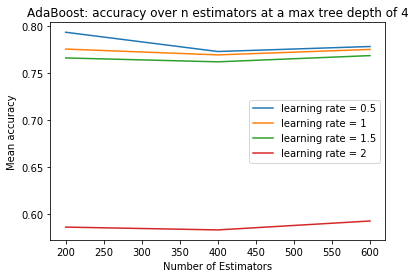

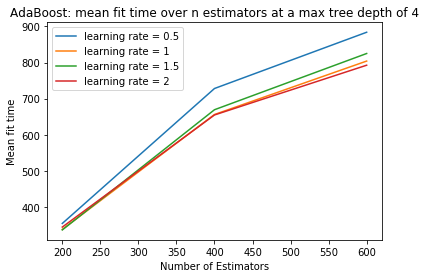

Tree depth 4, learning rate 0.5, best n estimators: 200
Tree depth 4, learning rate 0.5, best score: 0.79348
Test accuracy of AdaBoost (depth = 4, alpha = 0.5) with best params: 0.814
Tree depth 4, learning rate 1, best n estimators: 200
Tree depth 4, learning rate 1, best score: 0.7756
Test accuracy of AdaBoost (depth = 4, alpha = 1) with best params: 0.7978
Tree depth 4, learning rate 1.5, best n estimators: 600
Tree depth 4, learning rate 1.5, best score: 0.76864
Test accuracy of AdaBoost (depth = 4, alpha = 1.5) with best params: 0.77988
Tree depth 4, learning rate 2, best n estimators: 600
Tree depth 4, learning rate 2, best score: 0.59288
Test accuracy of AdaBoost (depth = 4, alpha = 2) with best params: 0.63756


In [8]:
###############################################################
### AdaBoost: Comparing Learning Rates with Tree Depth of 4 ###
###############################################################

# packages
import os  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

decisiontree_clf = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier()
adaboost_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', adaboost_clf)])

if not os.path.exists('AdaBoost'):
  os.makedirs('AdaBoost')

# Decision Tree Depth of 4, learning rate of 0.5
adaboost_params_1 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [200,400,600], 'clf__learning_rate': [0.5]}
adaboost_CV_1 =  GridSearchCV(adaboost_pipeline, param_grid=adaboost_params_1, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_1.fit(X_train_IMDb, y_train_IMDb)

# Decision Tree Depth of 4, learning rate of 1
adaboost_params_2 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [200,400,600], 'clf__learning_rate': [1]}
adaboost_CV_2 =  GridSearchCV(adaboost_pipeline, param_grid=adaboost_params_2, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_2.fit(X_train_IMDb, y_train_IMDb)

# Decision Tree Depth of 4, learning rate of 1.5
adaboost_params_3 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [200,400,600], 'clf__learning_rate': [1.5]}
adaboost_CV_3 =  GridSearchCV(adaboost_pipeline, param_grid=adaboost_params_3, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_3.fit(X_train_IMDb, y_train_IMDb)

# Decision Tree Depth of 4, learning rate of 2
adaboost_params_4 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [200,400,600], 'clf__learning_rate': [2]}
adaboost_CV_4 =  GridSearchCV(adaboost_pipeline, param_grid=adaboost_params_4, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_4.fit(X_train_IMDb, y_train_IMDb)


plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_test_score'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_test_score'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_test_score'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_test_score'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("AdaBoost: accuracy over n estimators at a max tree depth of 4")
plt.legend()
plt.savefig("AdaBoost/imdb_accuracy_depth_4.png")
plt.show()

plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_fit_time'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_fit_time'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_fit_time'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_fit_time'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean fit time")
plt.title("AdaBoost: mean fit time over n estimators at a max tree depth of 4")
plt.legend()
plt.savefig("AdaBoost/imdb_time_depth_4.png")
plt.show()

print("Tree depth 4, learning rate 0.5, best n estimators: "+ str(adaboost_CV_1.best_params_['clf__n_estimators']))
print("Tree depth 4, learning rate 0.5, best score: "+ str(adaboost_CV_1.best_score_))
print("Test accuracy of AdaBoost (depth = 4, alpha = 0.5) with best params: " + str(adaboost_CV_1.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

print("Tree depth 4, learning rate 1, best n estimators: "+ str(adaboost_CV_2.best_params_['clf__n_estimators']))
print("Tree depth 4, learning rate 1, best score: "+ str(adaboost_CV_2.best_score_))
print("Test accuracy of AdaBoost (depth = 4, alpha = 1) with best params: " + str(adaboost_CV_2.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

print("Tree depth 4, learning rate 1.5, best n estimators: "+ str(adaboost_CV_3.best_params_['clf__n_estimators']))
print("Tree depth 4, learning rate 1.5, best score: "+ str(adaboost_CV_3.best_score_))
print("Test accuracy of AdaBoost (depth = 4, alpha = 1.5) with best params: " + str(adaboost_CV_3.best_estimator_.score(X_test_IMDb, y_test_IMDb)))

print("Tree depth 4, learning rate 2, best n estimators: "+ str(adaboost_CV_4.best_params_['clf__n_estimators']))
print("Tree depth 4, learning rate 2, best score: "+ str(adaboost_CV_4.best_score_))
print("Test accuracy of AdaBoost (depth = 4, alpha = 2) with best params: " + str(adaboost_CV_4.best_estimator_.score(X_test_IMDb, y_test_IMDb)))